In [8]:
pip install selenium

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install beautifulsoup4

Note: you may need to restart the kernel to use updated packages.


In [2]:
a = "hello wandoo world!"
print(a)

hello wandoo world!


In [1]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.chrome.options import Options
from time import sleep

# create a new chrome session
# Chrome(chrome_options=options, ..로 하면
# chrome_options를 options로 바꾸라는 오류 표시됨
# DeprecationWarning: use options instead of chrome_options

options = Options()

driver = webdriver.Chrome(options=options, executable_path="/home/bitai/WDOP/proj_my/test_Wandoo_2/crawling_driver/chromedriver_linux64/chromedriver")
driver.maximize_window()


# Navigate to the application home page
# ./goods_review_list.php?goodsno=55222

# 메인 페이지 주소
# URL = 'https://www.kurly.com/shop/goods/goods_view.php?&goodsno=55222'

# 리뷰 페이지 주소
# URL = 'https://www.kurly.com/shop/goods/goods_review_list.php?goodsno=55222'
URL = 'https://www.kurly.com/shop/goods/goods_review_list.php?goodsno=55222&page=2'

# URL = 'http://deal.11st.co.kr/html/nc/deal/main.html'

driver.get(URL)

# 1.25초간 sleep
sleep(1.25)

page = driver.page_source
page

'<html lang="ko"><head><script type="text/javascript" src="https://bam.nr-data.net/1/NRJS-5dec146893a58b07e31?a=602251426&amp;v=1184.ab39b52&amp;to=MlZUZhdUXkoCAkBQDQscY0AMGkNRDBEbXg0KV0UdAlpfXRA%2BRlwUDFZBbQlcQ01NEVxJ&amp;rst=892&amp;ck=1&amp;ref=https://www.kurly.com/shop/goods/goods_review_list.php&amp;ap=84&amp;be=573&amp;fe=754&amp;dc=711&amp;perf=%7B%22timing%22:%7B%22of%22:1603965352408,%22n%22:0,%22f%22:0,%22dn%22:0,%22dne%22:0,%22c%22:0,%22ce%22:0,%22rq%22:406,%22rp%22:518,%22rpe%22:545,%22dl%22:536,%22di%22:710,%22ds%22:710,%22de%22:713,%22dc%22:754,%22l%22:754,%22le%22:758%7D,%22navigation%22:%7B%7D%7D&amp;fp=760&amp;fcp=760&amp;at=HhFXEF9OTUQ%3D&amp;jsonp=NREUM.setToken"></script><script src="https://js-agent.newrelic.com/nr-1184.min.js"></script><script type="text/javascript">(window.NREUM||(NREUM={})).loader_config={licenseKey:"NRJS-5dec146893a58b07e31",applicationID:"602251426"};window.NREUM||(NREUM={}),__nr_require=function(e,t,n){function r(n){if(!t[n]){var i=t[n]={exp

In [39]:
# 치즈 구매후기 제목 추출 - step1

from bs4 import BeautifulSoup

# html = driver.page_source

soup = BeautifulSoup(page,'lxml')

all_review_title = soup.find_all('div', 'fst')


review_title = soup.find_all('div', 'fst')

sleep(1.53)


#total = len(all_review_title)
# print(total)
review_title

# type(title) # type: list
#title


[<div class="fst">만족합니다. </div>,
 <div class="fst">무난 </div>,
 <div class="fst">짱짱 </div>,
 <div class="fst">베이글에 <img alt="이미지가 첨부됨" src="https://res.kurly.com/pc/ico/1910/ico_attach2.gif"/></div>,
 <div class="fst">굿 </div>]

In [38]:
# 치즈 구매후기 제목 추출 - step2

from bs4 import BeautifulSoup

# html = driver.page_source

soup = BeautifulSoup(page,'lxml')

all_review_title = soup.find_all('div', 'fst')


review_title = [soup.find_all('div', 'fst')
         [n].string for n in range(0, len(all_review_title))]


sleep(1.53)


#total = len(all_review_title)
# print(total)
review_title

# type(title) # type: list
#title


['만족합니다. ', '무난 ', '짱짱 ', None, '굿 ']

In [3]:
from bs4 import BeautifulSoup
from bs4.element import NavigableString

html = """
<div class="inner_view">
    <div class="name_purchase">
        [퀘스크렘] 블루치즈 크림치즈
    </div>
    <div class="review_photo"></div>
    진한 블루치즈 맛이네요    
</div>
"""

soup = BeautifulSoup(html, 'html.parser')
target_tag = soup.select_one('.inner_view')
print(target_tag.text)



        [퀘스크렘] 블루치즈 크림치즈
    

    진한 블루치즈 맛이네요    



In [33]:
soup = BeautifulSoup(html, 'html.parser')
target_tag = soup.select_one('.inner_view')

for bs_object in target_tag:
    print("[오브젝트]", type(bs_object))
    print("[대표형태]")
    print(bs_object)
    print("-----")

[오브젝트] <class 'bs4.element.NavigableString'>
[대표형태]


-----
[오브젝트] <class 'bs4.element.Tag'>
[대표형태]
<div class="name_purchase">
        [퀘스크렘] 블루치즈 크림치즈
    </div>
-----
[오브젝트] <class 'bs4.element.NavigableString'>
[대표형태]


-----
[오브젝트] <class 'bs4.element.Tag'>
[대표형태]
<div class="review_photo"></div>
-----
[오브젝트] <class 'bs4.element.NavigableString'>
[대표형태]

    진한 블루치즈 맛이네요    

-----


In [34]:
html = """
<div class="inner_view">
    <div class="name_purchase">
        [퀘스크렘] 블루치즈 크림치즈
    </div>
    <div class="review_photo"></div>
    진한 블루치즈 맛이네요    
</div>
"""

soup = BeautifulSoup(html, 'html.parser')
target_tag = soup.select_one('.inner_view')
target_text_without_child_tags = [
    bs_object
    for bs_object
    in target_tag
    if isinstance(bs_object, NavigableString)
]
text = "".join(target_text_without_child_tags)
print(text)




    진한 블루치즈 맛이네요    



<div class="inner_review">
<div class="name_purchase">
<strong class="name"></strong>
<p class="package"></p>
</div>
<div class="review_photo"></div>
<p class="MsoNormal">고객님 안녕하세요, 마켓컬리입니다.</p><p class="MsoNormal"><br/></p><p class="MsoNormal">■ Best 후기 당첨자 안내</p><p class="MsoNormal"><br/></p><p class="MsoNormal">[2020년 10월 19일 ~ 2020년 10월 25일]의 Best 후기 당첨자 공지드립니다.</p><p class="MsoNormal"><br/></p><p class="MsoNormal">정성껏 후기를 작성해주신 모든 고객님께 감사드립니다.<br/></p><p class="MsoNormal">Best 후기는 아래 게시판을 통해 확인 가능합니다.</p><p class="MsoNormal"><br/></p><p class="MsoNormal"><a href="http://www.kurly.com/shop/goods/goods_review_best.php">http://www.kurly.com/shop/goods/goods_review_best.php</a><br/></p><p class="MsoNormal"><br/>마켓컬리는 상품에 대한 고객 여러분의 생생한 의견을 듣고 더 나은 상품을 준비하기 위해 상품 후기 게시판을 운영하고 있습니다<span lang="EN-US">. </span><br/></p><p class="MsoNormal">실제로 상품의 후기가 구매 결정에 있어 큰 도움이 된 best 후기를 아래로 공유드립니다.</p><p class="MsoNormal"><br/></p><p class="MsoNormal"></p><br/><p class="MsoNormal"><span lang="EN-U
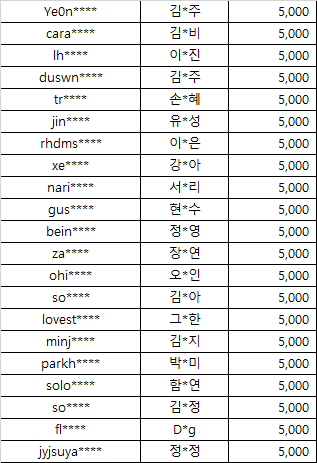

In [50]:
# 리뷰 1페이지에 마켓컬리 관리자가 작성한 공지가 2건 있다.
# 공지가 데이터 식별에 어려움을 주고 있어서 2페이지부터 진행할 예정.
# 1페이지의 내용을 출력해보았다.

soup = BeautifulSoup(page, 'html.parser')
target_tag = soup.select_one('.inner_review')
print(target_tag)

In [4]:
# 2페이지 결과값
soup = BeautifulSoup(page, 'html.parser')
target_tag = soup.select('.inner_review')
print(target_tag)

[<div class="inner_review">
<div class="name_purchase">
<strong class="name">[퀘스크렘] 블루치즈 크림치즈</strong>
<p class="package"></p>
</div>
<div class="review_photo"></div>
많이 꼬릿꼬릿(?)하진 않아요~적당히 즐길수 있는 불루 치즈 맛입니다~~^^
</div>, <div class="inner_review">
<div class="name_purchase">
<strong class="name">[퀘스크렘] 블루치즈 크림치즈</strong>
<p class="package"></p>
</div>
<div class="review_photo"></div>
이것만 먹으면 꼬릿한데 꿀 넣으면 존맛탱
</div>, <div class="inner_review">
<div class="name_purchase">
<strong class="name">[퀘스크렘] 블루치즈 크림치즈</strong>
<p class="package"></p>
</div>
<div class="review_photo"></div>
계속 재구매할것같아요
</div>, <div class="inner_review">
<div class="name_purchase">
<strong class="name">[퀘스크렘] 블루치즈 크림치즈</strong>
<p class="package"></p>
</div>
<div class="review_photo"></div>
진한 크림치즈를 먹고 싶다면추천<br/>
부드럽게 발리지는 않네요<br/>
그냥 얹어놓다시피 해서 먹어야해요
</div>, <div class="inner_review">
<div class="name_purchase">
<strong class="name">[퀘스크렘] 블루치즈 크림치즈</strong>
<p class="package"></p>
</div>
<div class="review_photo"></div

In [56]:
# 1단계

soup = BeautifulSoup(page, 'html.parser')
target_tag = soup.select_one('.inner_review')

print(target_tag)

<div class="inner_review">
<div class="name_purchase">
<strong class="name">[퀘스크렘] 블루치즈 크림치즈</strong>
<p class="package"></p>
</div>
<div class="review_photo"></div>
많이 꼬릿꼬릿(?)하진 않아요~적당히 즐길수 있는 불루 치즈 맛입니다~~^^
</div>


In [57]:
# 2단계

soup = BeautifulSoup(page, 'html.parser')
target_tag = soup.select_one('.inner_review')

for bs_object in target_tag:
    
    print("[오브젝트]", type(bs_object))
    print("[대표형태]")
    print(bs_object)
    print("-----")

[오브젝트] <class 'bs4.element.NavigableString'>
[대표형태]


-----
[오브젝트] <class 'bs4.element.Tag'>
[대표형태]
<div class="name_purchase">
<strong class="name">[퀘스크렘] 블루치즈 크림치즈</strong>
<p class="package"></p>
</div>
-----
[오브젝트] <class 'bs4.element.NavigableString'>
[대표형태]


-----
[오브젝트] <class 'bs4.element.Tag'>
[대표형태]
<div class="review_photo"></div>
-----
[오브젝트] <class 'bs4.element.NavigableString'>
[대표형태]

많이 꼬릿꼬릿(?)하진 않아요~적당히 즐길수 있는 불루 치즈 맛입니다~~^^

-----


In [5]:
# 3단계

soup = BeautifulSoup(page, 'html.parser')
target_tag = soup.select_one('.inner_review')

target_text_without_child_tags = [
    bs_object
    for bs_object
    in target_tag
    if isinstance(bs_object, NavigableString)
]
text = "".join(target_text_without_child_tags)
print(text)




많이 꼬릿꼬릿(?)하진 않아요~적당히 즐길수 있는 불루 치즈 맛입니다~~^^



In [41]:
# 3단계

soup = BeautifulSoup(page, 'html.parser')
target_tag = soup.select_one('.inner_review')

target_text_without_child_tags = [
    bs_object
    for bs_object in target_tag
        if isinstance(bs_object, NavigableString)
]

print(target_text_without_child_tags)

['\n', <div class="name_purchase">
<strong class="name">[퀘스크렘] 블루치즈 크림치즈</strong>
<p class="package"></p>
</div>, '\n', <div class="review_photo"></div>, '\n많이 꼬릿꼬릿(?)하진 않아요~적당히 즐길수 있는 불루 치즈 맛입니다~~^^\n']


In [48]:
# 3단계 - 복사 #깔피

soup = BeautifulSoup(page, 'html.parser')
target_tag = soup.select('.inner_review')



target_text_without_child_tags = [
    bs_object
    for bs_object in target_tag
        if isinstance(bs_object, NavigableString)
]
# text = "".join(target_text_without_child_tags)

# print(target_tag) - 7개 리뷰를 담고있는 태그가 나온다.
print(len(target_tag))
print(target_text_without_child_tags)
print("test=====" + text)


7
[]
test=====


많이 꼬릿꼬릿(?)하진 않아요~적당히 즐길수 있는 불루 치즈 맛입니다~~^^



In [31]:
for i in range(0, 3):
    for j in range(18, 20):
        print("Python wandoo(i-%d, j-%d)"%(i,j))

Python wandoo(i-0, j-18)
Python wandoo(i-0, j-19)
Python wandoo(i-1, j-18)
Python wandoo(i-1, j-19)
Python wandoo(i-2, j-18)
Python wandoo(i-2, j-19)


In [186]:
target_tag = soup.select('.inner_review')
print(target_tag)

[<div class="inner_review">
<div class="name_purchase">
<strong class="name">[퀘스크렘] 블루치즈 크림치즈</strong>
<p class="package"></p>
</div>
<div class="review_photo"></div>
많이 꼬릿꼬릿(?)하진 않아요~적당히 즐길수 있는 불루 치즈 맛입니다~~^^
</div>, <div class="inner_review">
<div class="name_purchase">
<strong class="name">[퀘스크렘] 블루치즈 크림치즈</strong>
<p class="package"></p>
</div>
<div class="review_photo"></div>
이것만 먹으면 꼬릿한데 꿀 넣으면 존맛탱
</div>, <div class="inner_review">
<div class="name_purchase">
<strong class="name">[퀘스크렘] 블루치즈 크림치즈</strong>
<p class="package"></p>
</div>
<div class="review_photo"></div>
계속 재구매할것같아요
</div>, <div class="inner_review">
<div class="name_purchase">
<strong class="name">[퀘스크렘] 블루치즈 크림치즈</strong>
<p class="package"></p>
</div>
<div class="review_photo"></div>
진한 크림치즈를 먹고 싶다면추천<br/>
부드럽게 발리지는 않네요<br/>
그냥 얹어놓다시피 해서 먹어야해요
</div>, <div class="inner_review">
<div class="name_purchase">
<strong class="name">[퀘스크렘] 블루치즈 크림치즈</strong>
<p class="package"></p>
</div>
<div class="review_photo"></div

In [46]:
# 3단계 #깔피

soup = BeautifulSoup(page, 'html.parser')
target_tag = soup.select('.inner_review')

bs_object
    
    for bs_object in target_tag:
        bs_object

type(child_tags)

#for i in range(len(target_tag)):
#    print(child_tags)

child_tags

IndentationError: unexpected indent (<ipython-input-46-345c5ffe2f2e>, line 8)

In [159]:
target_tag

<div class="inner_review">
<div class="name_purchase">
<strong class="name">[퀘스크렘] 블루치즈 크림치즈</strong>
<p class="package"></p>
</div>
<div class="review_photo"></div>
많이 꼬릿꼬릿(?)하진 않아요~적당히 즐길수 있는 불루 치즈 맛입니다~~^^
</div>

In [245]:
# 3단계 - 복사2

soup = BeautifulSoup(page, 'html.parser')

target_tag_len = soup.select('.inner_review')
target_tag = soup.select('.inner_review')

review_list = []

type(target_tag)

for i in range(0, len(target_tag_len)):
    bs_object
    
    print("=====0")
    review_row = []

    for bs_object in target_tag:
        print("=====1")
        
        if isinstance(bs_object, NavigableString):
            
            
            print("=====2")
            review_row.append(bs_object[i].text.split('꽥'))
            
            print("=====3")            
            review_list.append(review_row)sdfsdf
    
review_list

SyntaxError: invalid syntax (<ipython-input-245-4a057d686502>, line 28)

In [18]:
# 3단계 - 복사2

soup = BeautifulSoup(page, 'html.parser')

target_tag_len = soup.select('.inner_review')
target_tag = soup.select('.inner_review')

type(target_tag)
target_tag


[<div class="inner_review">
 <div class="name_purchase">
 <strong class="name">[퀘스크렘] 블루치즈 크림치즈</strong>
 <p class="package"></p>
 </div>
 <div class="review_photo"></div>
 많이 꼬릿꼬릿(?)하진 않아요~적당히 즐길수 있는 불루 치즈 맛입니다~~^^
 </div>,
 <div class="inner_review">
 <div class="name_purchase">
 <strong class="name">[퀘스크렘] 블루치즈 크림치즈</strong>
 <p class="package"></p>
 </div>
 <div class="review_photo"></div>
 이것만 먹으면 꼬릿한데 꿀 넣으면 존맛탱
 </div>,
 <div class="inner_review">
 <div class="name_purchase">
 <strong class="name">[퀘스크렘] 블루치즈 크림치즈</strong>
 <p class="package"></p>
 </div>
 <div class="review_photo"></div>
 계속 재구매할것같아요
 </div>,
 <div class="inner_review">
 <div class="name_purchase">
 <strong class="name">[퀘스크렘] 블루치즈 크림치즈</strong>
 <p class="package"></p>
 </div>
 <div class="review_photo"></div>
 진한 크림치즈를 먹고 싶다면추천<br/>
 부드럽게 발리지는 않네요<br/>
 그냥 얹어놓다시피 해서 먹어야해요
 </div>,
 <div class="inner_review">
 <div class="name_purchase">
 <strong class="name">[퀘스크렘] 블루치즈 크림치즈</strong>
 <p class="package"></p>
 

In [7]:
# 얘는 리스트가 아니다
# 리스트로 만들어줘야 위에서 쓸 수 있다.
# 잘 나왔었는데 오류발생함

# Type: bs4.element.Tag
wanpoo = soup.select('.inner_review').text.split('\n')


print(wanpoo)
type(wanpoo)

AttributeError: ResultSet object has no attribute 'text'. You're probably treating a list of elements like a single element. Did you call find_all() when you meant to call find()?

In [10]:
# 얘는 리스트가 아니다
# 리스트로 만들어줘야 위에서 쓸 수 있다.

# Type: bs4.element.Tag
# 제품명, 상세 리뷰가 같이 있다.
# prod_name = soup.select('.inner_review')
# review_detail = soup.select('.inner_review').text.split('\n\n\n\n')

review_detail = soup.select('.inner_review')

print(review_detail)
type(review_detail)

[<div class="inner_review">
<div class="name_purchase">
<strong class="name">[퀘스크렘] 블루치즈 크림치즈</strong>
<p class="package"></p>
</div>
<div class="review_photo"></div>
많이 꼬릿꼬릿(?)하진 않아요~적당히 즐길수 있는 불루 치즈 맛입니다~~^^
</div>, <div class="inner_review">
<div class="name_purchase">
<strong class="name">[퀘스크렘] 블루치즈 크림치즈</strong>
<p class="package"></p>
</div>
<div class="review_photo"></div>
이것만 먹으면 꼬릿한데 꿀 넣으면 존맛탱
</div>, <div class="inner_review">
<div class="name_purchase">
<strong class="name">[퀘스크렘] 블루치즈 크림치즈</strong>
<p class="package"></p>
</div>
<div class="review_photo"></div>
계속 재구매할것같아요
</div>, <div class="inner_review">
<div class="name_purchase">
<strong class="name">[퀘스크렘] 블루치즈 크림치즈</strong>
<p class="package"></p>
</div>
<div class="review_photo"></div>
진한 크림치즈를 먹고 싶다면추천<br/>
부드럽게 발리지는 않네요<br/>
그냥 얹어놓다시피 해서 먹어야해요
</div>, <div class="inner_review">
<div class="name_purchase">
<strong class="name">[퀘스크렘] 블루치즈 크림치즈</strong>
<p class="package"></p>
</div>
<div class="review_photo"></div

bs4.element.ResultSet

In [333]:
review_detail_1dim = review_detail.pop(0)

review_detail_1dim

['\n\n[퀘스크렘] 블루치즈 크림치즈', '이것만 먹으면 꼬릿한데 꿀 넣으면 존맛탱\n']

In [304]:
review_detail.pop(2)

['\n\n[퀘스크렘] 블루치즈 크림치즈',
 '진한 크림치즈를 먹고 싶다면추천\n부드럽게 발리지는 않네요\n그냥 얹어놓다시피 해서 먹어야해요\n']

In [11]:
#리뷰 작성일
review_time = soup.select('.time')

review_time

[<td class="time">2020-10-25</td>,
 <td class="time">2020-10-25</td>,
 <td class="time">2020-10-24</td>,
 <td class="time">2020-10-24</td>,
 <td class="time">2020-10-24</td>,
 <td class="time">2020-10-24</td>,
 <td class="time">2020-10-23</td>]

In [21]:
# 리뷰 제목
review_title = soup.select('.fst')

review_title

[<div class="fst">좋아요 <img alt="이미지가 첨부됨" src="https://res.kurly.com/pc/ico/1910/ico_attach2.gif"/></div>,
 <div class="fst">꿀이랑 너무 잘 어울림 </div>,
 <div class="fst">맛있어요 </div>,
 <div class="fst">제대로 치즈 </div>,
 <div class="fst">크림치즈 </div>,
 <div class="fst">연어베이글을 위해 <img alt="이미지가 첨부됨" src="https://res.kurly.com/pc/ico/1910/ico_attach2.gif"/></div>,
 <div class="fst">블루치즈는 처음인데 </div>]

In [20]:
# 리뷰 제목 2
# 리뷰에 이미지가 들어간 제목은 ""로 감싸져서 None으로 나온다(좋아요, "좋아요") 
review_all_title = soup.find_all('div', 'fst')

review_title = [soup.find_all('div', 'fst')[n].string for n in range(0, len(review_all_title))]


review_title

[None, '꿀이랑 너무 잘 어울림 ', '맛있어요 ', '제대로 치즈 ', '크림치즈 ', None, '블루치즈는 처음인데 ']

In [13]:
# 조회수
review_views = soup.select('.review-hit-cnt')

review_views

[<span class="review-hit-cnt" data-sno="18300508">3</span>,
 <span class="review-hit-cnt" data-sno="18268182">1</span>,
 <span class="review-hit-cnt" data-sno="18264661">1</span>,
 <span class="review-hit-cnt" data-sno="18263727">1</span>,
 <span class="review-hit-cnt" data-sno="18247566">0</span>,
 <span class="review-hit-cnt" data-sno="18241216">1</span>,
 <span class="review-hit-cnt" data-sno="18217518">2</span>]

In [301]:
review_views[i].text.split('<span')

type(review_views)

bs4.element.ResultSet

In [22]:
review_list = []


for i in range(0, len(target_tag)):
    review_row = []
    review_row.append(review_title[i].text.split('<div class="fst">'))
    
    #review_row.append(review_detail[])
    
    review_row.append(review_time[i].text.split('<td class="time">'))
    review_row.append(review_views[i].text.split('<span'))
    
    review_list.append(review_row)
    
review_list

[[['좋아요 '], ['2020-10-25'], ['3']],
 [['꿀이랑 너무 잘 어울림 '], ['2020-10-25'], ['1']],
 [['맛있어요 '], ['2020-10-24'], ['1']],
 [['제대로 치즈 '], ['2020-10-24'], ['1']],
 [['크림치즈 '], ['2020-10-24'], ['0']],
 [['연어베이글을 위해 '], ['2020-10-24'], ['1']],
 [['블루치즈는 처음인데 '], ['2020-10-23'], ['2']]]

In [285]:
# 수업때는 텍스트를 보냈지만 기능 보내는 것도 상관없다고 하심
# Flask 서버로 파이썬 컨트롤러와 스프링 컨트롤러가 통신할 수 있고
# 텍스트를 받던지 기능을 받던지는 문제가 되지 않는다.

# csv download(검색용 주석)
# csv(comma-separated values) 파일 다운로드하기

import csv

vid_csv_file = open("/home/bitai/WDOP/proj_my/test_Wandoo_2/crawling_driver/cheese2pic.csv", "w", newline="")
vid_csv_writer = csv.writer(vid_csv_file)

# youtube_video_list(크롤링 데이터)를 vs_row에 넣고 돌린다.
# writerow 메소드로 vs_row를 csv 파일에 한줄씩 반복해서 넣는다.
for vs_row in review_list:
    vid_csv_writer.writerow(vs_row)
    
vid_csv_file.close()

In [207]:
# str -> list 만들기(spit 함수)
# type 체크할 때 a로 확인하면 str로 나옴
# b로 변수 따로 만들어서 해야 list가 나온다.
a = "kim"

b = a.split('쉙')
type(b)

list

In [151]:
soup.select('.inner_review')[1]

<div class="inner_review">
<div class="name_purchase">
<strong class="name">[퀘스크렘] 블루치즈 크림치즈</strong>
<p class="package"></p>
</div>
<div class="review_photo"></div>
이것만 먹으면 꼬릿한데 꿀 넣으면 존맛탱
</div>

In [132]:
review_list = []

for i in range(0, len(target_tag)):
    review_row = []
    
    review_row.append(text[i])
    
    review_list.append(review_row)
    
review_list


[['\n'], ['\n'], ['\n'], ['많'], ['이']]

In [15]:
# 최종 리스트 뽑기

import time
import random

soup = BeautifulSoup(page, 'html.parser')
target_tag = soup.select('.inner_review')

target_text_without_child_tags = [
    bs_object
    for bs_object
    in target_tag
    if isinstance(bs_object, NavigableString)
]
text = "".join(target_text_without_child_tags)

reviews = [soup.select('.inner_review')[n] for n in range(0, len(target_tag))]

# 1~5초 사이 랜덤한 시간으로 휴식 후 데이터 긁어옴
time.sleep(random.uniform(1, 1.2))

print(reviews)

[<div class="inner_review">
<div class="name_purchase">
<strong class="name">[퀘스크렘] 블루치즈 크림치즈</strong>
<p class="package"></p>
</div>
<div class="review_photo"></div>
많이 꼬릿꼬릿(?)하진 않아요~적당히 즐길수 있는 불루 치즈 맛입니다~~^^
</div>, <div class="inner_review">
<div class="name_purchase">
<strong class="name">[퀘스크렘] 블루치즈 크림치즈</strong>
<p class="package"></p>
</div>
<div class="review_photo"></div>
이것만 먹으면 꼬릿한데 꿀 넣으면 존맛탱
</div>, <div class="inner_review">
<div class="name_purchase">
<strong class="name">[퀘스크렘] 블루치즈 크림치즈</strong>
<p class="package"></p>
</div>
<div class="review_photo"></div>
계속 재구매할것같아요
</div>, <div class="inner_review">
<div class="name_purchase">
<strong class="name">[퀘스크렘] 블루치즈 크림치즈</strong>
<p class="package"></p>
</div>
<div class="review_photo"></div>
진한 크림치즈를 먹고 싶다면추천<br/>
부드럽게 발리지는 않네요<br/>
그냥 얹어놓다시피 해서 먹어야해요
</div>, <div class="inner_review">
<div class="name_purchase">
<strong class="name">[퀘스크렘] 블루치즈 크림치즈</strong>
<p class="package"></p>
</div>
<div class="review_photo"></div

In [113]:
# 최종 리스트 뽑기

import time
import random

soup = BeautifulSoup(page, 'html.parser')
target_tag = soup.select('.inner_review')

for reviews in target_text_without_child_tags = [
    bs_object
    for bs_object
    in target_tag
    if isinstance(bs_object, NavigableString)
]
# review = "".join(target_text_without_child_tags)

# reviews = [text[n] for n in range(0, len(target_tag))]

# 1~5초 사이 랜덤한 시간으로 휴식 후 데이터 긁어옴
time.sleep(random.uniform(1, 1.2))

print(len(reviews))
print(reviews)
#print(review)
#print(len(target_tag))
#print(len(target_text_without_child_tags))
#print(target_text_without_child_tags)



SyntaxError: invalid syntax (<ipython-input-113-fd4ba77e25c9>, line 9)

In [92]:
# 최종 리스트 뽑기 - 2

import time
import random

soup = BeautifulSoup(page, 'html.parser')
target_tag = soup.select('.inner_review')

target_text_without_child_tags = [
    bs_object
    for bs_object
    in target_tag
    if isinstance(bs_object, NavigableString)
]

for wandoo in target_text_without_child_tags[0]:
    print(wandoo)

# text = target_text_without_child_tags

# reviews = [target_text_without_child_tags[n] for n in range(0, len(target_tag))]

# 1~5초 사이 랜덤한 시간으로 휴식 후 데이터 긁어옴
time.sleep(random.uniform(1, 1.2))

# print(len(target_tag)) -> 7
# print(len(target_text_without_child_tags)) -> 0


IndexError: list index out of range

In [143]:
a = 'apple'
b = 'banana'

print(a[2:4])
print(b[2:4])

pl
na


In [150]:
import re

str1 = 'hello world! world world'
str2 = 'world'
    
for a in re.finditer(str2, str1) :
    print(a.start())

6
13
19


In [140]:
# 치즈 구매후기 제목 추출 - 상세 후기

from bs4 import BeautifulSoup

# html = driver.page_source

soup = BeautifulSoup(page,'lxml')

all_review_detail = soup.find_all('div', 'review_photo')


review_detail = soup.find_all('div', 'review_photo')

sleep(1.53)


#total = len(all_review_title)
# print(total)
review_detail

# type(title) # type: list
#title


[<div class="review_photo"></div>,
 <div class="review_photo"></div>,
 <div class="review_photo"></div>,
 <div class="review_photo"></div>,
 <div class="review_photo"></div>,
 <div class="review_photo"></div>,
 <div class="review_photo"></div>]

In [ ]:
import time
import random

# 1~5초 사이 랜덤한 시간으로 휴식 후 데이터 긁어옴
time.sleep(random.uniform(1, 5))

# print 넣은 값과 그냥 뿌린 값의 출력모양이 다르다(수평, 수직)
print(video_time)
print("=============================================================")
video_time

In [188]:
import time
import random

# 리뷰 제품명
# review_product = soup.find_all('div', 'test')
# review_product = driver.find_elements_by_xpath('/html/body/div/div[1]/div/form/div[4]/div/div[1]/text()')


time.sleep(random.uniform(1, 2))

# 리뷰 상세내용
# review_detail = soup.find_all('div', 'inner_review')
review_detail = driver.find_element_by_xpath('div[]')

# 리뷰 작성일
# review_create_date

# 리뷰 조회수
# review_views


review_product
# review_detail
# print(review_product)

# review_detail


WebDriverException: Message: chrome not reachable
  (Session info: chrome=85.0.4183.121)


In [129]:
print(review_product.text)

# 값이 안나옴

In [34]:
type(channel_name)

bs4.element.NavigableString

In [45]:
a = 'https://www.youtube.com//watch?v=gkL4WkUqs4s'

len(a)

44

In [33]:
a = 'apple'
b = 'banana'

a + b

'applebanana'

In [10]:
from time import localtime, strftime

# 현재 시간
present_datetime = strftime("%Y/%m/%d %H:%M:%S", localtime())

present_datetime

'2020/09/25 10:59:18'

In [67]:
type(video_link.get('href'))

str

In [ ]:
for video_link in soup.find_all('a', 'yt-simple-endpoint style-scope ytd-grid-video-renderer'):
    
    print("https://www.youtube.com/" + video_link.get('href'))

In [40]:
len(youtube_video_list)

30

In [41]:
type(youtube_video_list)

list

In [13]:
type(pd_youtube_video_list)

pandas.core.frame.DataFrame

In [154]:
!head /home/bitai/Documents/EMP_Team/DataSet/치즈_리뷰_마켓컬리.csv

번호,제품명,후기 제목,후기 상세,작성일,조회수
1,[퀘스크렘] 블루치즈 크림치즈,맛있어요,크림치즈는 사랑입니다,2020-10-19,2
2,[퀘스크렘] 블루치즈 크림치즈,만족합니다.,잘 숙성된 치즈의 향입니다.,2020-10-17,2
3,[퀘스크렘] 블루치즈 크림치즈,무난,블루치즈 잘 못먹는 분들도 드실 수 있을 것 같아요,2020-10-15,6
4,[퀘스크렘] 블루치즈 크림치즈,짱짱,재구매 의사 백프로입니다. 달지않고 짜지도 않은 데일리로 즐기기 좋은 깊이감있는 맛의 크림치즈입니다!,2020-10-15,5
5,[퀘스크렘] 블루치즈 크림치즈,베이글에,발라 먹어보려구요 ㅎㅎ,2020-10-15,17
6,[퀘스크렘] 블루치즈 크림치즈,굿,생각보다 안큠쿰해요^^,2020-10-15,6
7,[퀘스크렘] 블루치즈 크림치즈,재구매,블루치즈향 심하지않아요. 너무 맛있어요,2020-10-14,20
8,[퀘스크렘] 블루치즈 크림치즈,진한 크림치즈,컬리에서 산 픽어베이글 + 아보카도랑 같이 먹었어요  블루치즈 크림치즈 엄청 꾸덕하고 맛있어요 최고,2020-10-13,17
9,[퀘스크렘] 블루치즈 크림치즈,맛있어요,향도진하고 바게뜨에발라 먹으니 맛있네요,2020-10-13,7


In [171]:
import pandas as pd

cheese_data_frame = pd.read_csv(
    '/home/bitai/Documents/EMP_Team/DataSet/치즈_리뷰_마켓컬리.csv',
    sep=','
)

In [172]:
cheese_data_frame

,번호,제품명,후기 제목,후기 상세,작성일,조회수
0,1,[퀘스크렘] 블루치즈 크림치즈,맛있어요,크림치즈는 사랑입니다,2020-10-19,2.0
1,2,[퀘스크렘] 블루치즈 크림치즈,만족합니다.,잘 숙성된 치즈의 향입니다.,2020-10-17,2.0
2,3,[퀘스크렘] 블루치즈 크림치즈,무난,블루치즈 잘 못먹는 분들도 드실 수 있을 것 같아요,2020-10-15,6.0
3,4,[퀘스크렘] 블루치즈 크림치즈,짱짱,재구매 의사 백프로입니다. 달지않고 짜지도 않은 데일리로 즐기기 좋은 깊이감있는 맛...,2020-10-15,5.0
4,5,[퀘스크렘] 블루치즈 크림치즈,베이글에,발라 먹어보려구요 ㅎㅎ,2020-10-15,17.0
...,...,...,...,...,...,...
140,141,[포인트 레이스] 오리지널 블루,좋아요,"아빠가 항상 두고 드시는 블루치즈! 컬리에서 파는 프랑스,미국 블루치즈 둘다 보내드...",2020-08-23,10.0
141,142,[포인트 레이스] 오리지널 블루,블루,오리지널 블루치즈 쪼아요,2020-08-04,18.0
142,143,[포인트 레이스] 오리지널 블루,입이 즐거운,블루치즈 진하고 풍미가 있어 맛있게 잘먹었어요~!,2020-08-04,42.0
143,144,[포인트 레이스] 오리지널 블루,샐러드에 빵에,포인트로 조금씩 얹어 먹어요,2020-08-02,41.0


In [159]:
cheese_data_frame.head(10)

,번호,제품명,후기 제목,후기 상세,작성일,조회수
0,1,[퀘스크렘] 블루치즈 크림치즈,맛있어요,크림치즈는 사랑입니다,2020-10-19,2.0
1,2,[퀘스크렘] 블루치즈 크림치즈,만족합니다.,잘 숙성된 치즈의 향입니다.,2020-10-17,2.0
2,3,[퀘스크렘] 블루치즈 크림치즈,무난,블루치즈 잘 못먹는 분들도 드실 수 있을 것 같아요,2020-10-15,6.0
3,4,[퀘스크렘] 블루치즈 크림치즈,짱짱,재구매 의사 백프로입니다. 달지않고 짜지도 않은 데일리로 즐기기 좋은 깊이감있는 맛...,2020-10-15,5.0
4,5,[퀘스크렘] 블루치즈 크림치즈,베이글에,발라 먹어보려구요 ㅎㅎ,2020-10-15,17.0
5,6,[퀘스크렘] 블루치즈 크림치즈,굿,생각보다 안큠쿰해요^^,2020-10-15,6.0
6,7,[퀘스크렘] 블루치즈 크림치즈,재구매,블루치즈향 심하지않아요. 너무 맛있어요,2020-10-14,20.0
7,8,[퀘스크렘] 블루치즈 크림치즈,진한 크림치즈,컬리에서 산 픽어베이글 + 아보카도랑 같이 먹었어요 블루치즈 크림치즈 엄청 꾸덕하...,2020-10-13,17.0
8,9,[퀘스크렘] 블루치즈 크림치즈,맛있어요,향도진하고 바게뜨에발라 먹으니 맛있네요,2020-10-13,7.0
9,10,[퀘스크렘] 블루치즈 크림치즈,맛있어요,정말 맛있어요 계속 먹게되어요,2020-10-10,27.0


In [160]:
cheese_data_frame.shape

(145, 6)

In [162]:
cheese_data_frame.dtypes

번호         int64
제품명       object
후기 제목     object
후기 상세     object
작성일       object
조회수      float64
dtype: object

In [164]:
cheese_data_frame.조회수.dtypes

dtype('float64')

In [165]:
df = pd.DataFrame(cheese_data_frame)

In [169]:
pd.to_numeric(df['조회수'], downcast='integer')

0       2.0
1       2.0
2       6.0
3       5.0
4      17.0
       ... 
140    10.0
141    18.0
142    42.0
143    41.0
144    30.0
Name: 조회수, Length: 145, dtype: float64

In [170]:
cheese_data.조회수.dtypes

dtype('float64')

In [173]:
# 빈 값(NaN) 조회

cheese_data_frame.isnull().sum()

번호       0
제품명      6
후기 제목    6
후기 상세    6
작성일      6
조회수      6
dtype: int64

In [174]:
# 빈 값(NaN) 제거 후 df 조회, 행이 줄어든 것이 확인된다.
cheese_data_frame = cheese_data_frame.dropna()

cheese_data_frame

,번호,제품명,후기 제목,후기 상세,작성일,조회수
0,1,[퀘스크렘] 블루치즈 크림치즈,맛있어요,크림치즈는 사랑입니다,2020-10-19,2.0
1,2,[퀘스크렘] 블루치즈 크림치즈,만족합니다.,잘 숙성된 치즈의 향입니다.,2020-10-17,2.0
2,3,[퀘스크렘] 블루치즈 크림치즈,무난,블루치즈 잘 못먹는 분들도 드실 수 있을 것 같아요,2020-10-15,6.0
3,4,[퀘스크렘] 블루치즈 크림치즈,짱짱,재구매 의사 백프로입니다. 달지않고 짜지도 않은 데일리로 즐기기 좋은 깊이감있는 맛...,2020-10-15,5.0
4,5,[퀘스크렘] 블루치즈 크림치즈,베이글에,발라 먹어보려구요 ㅎㅎ,2020-10-15,17.0
...,...,...,...,...,...,...
140,141,[포인트 레이스] 오리지널 블루,좋아요,"아빠가 항상 두고 드시는 블루치즈! 컬리에서 파는 프랑스,미국 블루치즈 둘다 보내드...",2020-08-23,10.0
141,142,[포인트 레이스] 오리지널 블루,블루,오리지널 블루치즈 쪼아요,2020-08-04,18.0
142,143,[포인트 레이스] 오리지널 블루,입이 즐거운,블루치즈 진하고 풍미가 있어 맛있게 잘먹었어요~!,2020-08-04,42.0
143,144,[포인트 레이스] 오리지널 블루,샐러드에 빵에,포인트로 조금씩 얹어 먹어요,2020-08-02,41.0


In [175]:
# 빈 값(NaN) 다시 조회

cheese_data_frame.isnull().sum()

번호       0
제품명      0
후기 제목    0
후기 상세    0
작성일      0
조회수      0
dtype: int64

In [178]:
# csv 파일로 저장하기
cheese_data_frame.to_csv('cheese_EMP.csv')

In [179]:
# csv 파일 구분자 쉼표(,)로 되있던 것 세미콜론(;)으로 바꾸기
with open('cheese_EMP.csv', 'r', encoding='utf-8') as f_in, open("cheese_convert_file", 'w') as f_out:
    for line in f_in:
        line = line.split(",")
        line = ";".join(line)
        f_out.write(line)

In [180]:
# 번호 컬럼 삭제하기
# axis = 1 은 열로 제거, axis = 0은 행으로 제거
feats = cheese_data_frame.drop('번호', axis = 1)

In [182]:
# 번호 컬럼 제거 후 df 조회
feats

,제품명,후기 제목,후기 상세,작성일,조회수
0,[퀘스크렘] 블루치즈 크림치즈,맛있어요,크림치즈는 사랑입니다,2020-10-19,2.0
1,[퀘스크렘] 블루치즈 크림치즈,만족합니다.,잘 숙성된 치즈의 향입니다.,2020-10-17,2.0
2,[퀘스크렘] 블루치즈 크림치즈,무난,블루치즈 잘 못먹는 분들도 드실 수 있을 것 같아요,2020-10-15,6.0
3,[퀘스크렘] 블루치즈 크림치즈,짱짱,재구매 의사 백프로입니다. 달지않고 짜지도 않은 데일리로 즐기기 좋은 깊이감있는 맛...,2020-10-15,5.0
4,[퀘스크렘] 블루치즈 크림치즈,베이글에,발라 먹어보려구요 ㅎㅎ,2020-10-15,17.0
...,...,...,...,...,...
140,[포인트 레이스] 오리지널 블루,좋아요,"아빠가 항상 두고 드시는 블루치즈! 컬리에서 파는 프랑스,미국 블루치즈 둘다 보내드...",2020-08-23,10.0
141,[포인트 레이스] 오리지널 블루,블루,오리지널 블루치즈 쪼아요,2020-08-04,18.0
142,[포인트 레이스] 오리지널 블루,입이 즐거운,블루치즈 진하고 풍미가 있어 맛있게 잘먹었어요~!,2020-08-04,42.0
143,[포인트 레이스] 오리지널 블루,샐러드에 빵에,포인트로 조금씩 얹어 먹어요,2020-08-02,41.0


In [186]:
# 번호 컬럼 제거한 df를 csv로 저장하기

feats.to_csv('cheese_EMP_2.csv')

In [187]:
# csv 파일 구분자 쉼표(,)로 되있던 것 세미콜론(;)으로 바꾸기
with open('cheese_EMP_2.csv', 'r', encoding='utf-8') as f_in, open("cheese_EMP_2_convert.csv", 'w') as f_out:
    for line in f_in:
        line = line.split(",")
        line = ";".join(line)
        f_out.write(line)

In [ ]:
========================================== 아래로는 예전에 작성했던 코드 ==========================================

In [61]:
pip install pymysql

Note: you may need to restart the kernel to use updated packages.


In [64]:
# mysql로 DB 만들기
# video_crawl_db의 테이블

CREATE TABLE video_crawl_table(
    `youtube_no` INT NOT NULL AUTO_INCREMENT, # PK
    `youtuber_name` VARCHAR(80),
    `youtube_title` VARCHAR(100),
    `youtube_play_time` VARCHAR(30),
    `subscribe_num` VARCHAR(100),
    `views_num` VARCHAR(100),
    `upload_time` VARCHAR(80),
    `crawling_time` VARCHAR(80),
    `youtube_link` VARCHAR(100),
    PRIMARY KEY(youtube_no)
) CHARSET = utf8;

SyntaxError: invalid syntax (<ipython-input-64-22b3bee365f7>, line 3)

In [ ]:
# 크롤링 영문 단어 입력시 오타 주의

In [ ]:
========================================== bye bye ==========================================

In [22]:
# not enough arguments for format string 오류로
# 고통받다가 성공한 mysql insert 코드

import pymysql

connect = pymysql.connect(host='localhost', user='bitai', password='456123', db='testdb', charset='utf8mb4')
cursor = connect.cursor()

for r in youtube_video_list:
    youtuber_name = str(r[0])
    youtube_title = str(r[1])
    youtube_play_time = str(r[2])
    subscribe_num = str(r[3])
    views_num = str(r[4])
    upload_time = str(r[5])
    crawling_time = str(r[6])
    youtube_link = str(r[7])
    
    sql = """insert into video_crawl_table
    (
    
    youtuber_name, 
    youtube_title, 
    youtube_play_time, 
    subscribe_num, 
    views_num, 
    upload_time, 
    crawling_time, 
    youtube_link
    
    ) 
    
    values ('%s', '%s', '%s', '%s', '%s', '%s', '%s', '%s')
    """ % (youtuber_name, youtube_title, youtube_play_time, subscribe_num, views_num, upload_time, crawling_time, youtube_link)
    
    cursor.execute(sql)
    connect.commit()
    
connect.close()